### 1. Demonstration on how to read a given section of the Gray data with the LFP class

The LFP class is part of the GDa (Gray Data Analysis) package, and it is used to read and save the gray data in python format for further processing such as the pair-wise coherence computation using another class called 'spectral_analysis' (discussed below in item 2).

It can be imported as:

In [1]:
from GDa.LFP import LFP

To instantiate a LFP class you have to call the constructor method and give the parameters listed below:
1. raw_path : The path to the raw data, in this example it is 'GrayLab/';
2. monkey   : The monkey name, it should be either 'lucy' or 'ethyl';
3. stype    : The type of session, it should be either 'samplecor', 'sampleinc' or 'samplecorinc' (in this example we are using only trials with correct answers);
4. date     : The date to use in a given section (in this example we have '141014', '141015', '141205', '150128', '150211', '150304' available);
5. session  : The section to use, it should be either session01 or session02;
6. evt_dt   : The time window that should be used using sample on as the referece (in this example we are using from 0.65 s befor sample on to 3 s after it);

In [2]:
lfp_data = LFP(raw_path = 'GrayLab/', monkey = 'lucy', stype = 'samplecor', date = '150128', 
               session = 'session01', evt_dt = [-0.65,3.00])

When the constructor is called it instantiate the variable, and pass the argument values to its internal atributes, and also create the paths to read and save data (the LFP class inherit another class called set_path in io.py), it does it via the method 'define_paths'. It is possible to check those directories with the following commands:

In [3]:
print('It you read the data from: ' + lfp_data.dir)     
print('It you save the data in:   ' + lfp_data.dir_out)

It you read the data from: GrayLab/lucy/150128/session01/
It you save the data in:   Results/lucy/150128/session01/


Next we should read the trial, and recording informations. This can be done by reading the files 'trial_info.mat', and 'recording_info.mat' in the firts directory printed above. It can be done by calling the method 'read_session_info()':

In [4]:
lfp_data.read_session_info()

You can print some of those informations using the method 'print_info()':

In [5]:
lfp_data.print_info()


-------------------+-----------
Number of channels | 56
-------------------+-----------
Number of trials   | 1006.0
-------------------+-----------
Sample frequency   | 1000 Hz
-------------------+-----------


You can check other informations contained in those dictionaries by calling the method 'keys()':

In [6]:
print('Recording info keys')
print('----------------------------------------------------------------------------------------')
print(lfp_data.recording_info.keys())
print('----------------------------------------------------------------------------------------')
print('Trial info keys')
print('----------------------------------------------------------------------------------------')
print(lfp_data.trial_info.keys())

Recording info keys
----------------------------------------------------------------------------------------
dict_keys(['image_locations', 'image_names', 'image_data', 'channel_count', 'channel_numbers', 'area', 'depth', 'fsample', 'calib_eye_sampling_rate', 'number_sua', 'ms_mod', 'slvr'])
----------------------------------------------------------------------------------------
Trial info keys
----------------------------------------------------------------------------------------
dict_keys(['behavioral_response', 'match_image', 'match_location', 'match_on', 'nonmatch_image', 'nonmatch_location', 'num_trials', 'reaction_time', 'sample_image', 'sample_location', 'sample_off', 'sample_on', 'trial_type'])


If you want to check a specif info you only have to access those dicitionaries with the specific key. For instance, lets say I want to see the distribution of the channels across the cortex, I can acess the field 'area' in the 'recording_info' dicitionary, and plot an histogram. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.unique(lfp_data.recording_info['area'])
c, x = np.histogram(lfp_data.recording_info['area'], bins = np.unique(lfp_data.recording_info['area']))
plt.plot(range(len(c)), c)
plt.xticks(range(len(c)), x, rotation = 90)
plt.ylabel('#')
plt.xlabel('Areas')
plt.title('Distribution of channels across the cortex')
plt.show()

<Figure size 640x480 with 1 Axes>

Next, we should be able to read the LFP data using the method 'read_lfp_data()': 

In [8]:
lfp_data.read_lfp_data()

Reading data...


The data can then be acessed by calling the 'data' atribute:

In [9]:
print('Printing a portion of the data ')
print('------------------------------------------------------------------')
print(lfp_data.data[:5,0,:5])
print('Printing the data shape')
print('------------------------------------------------------------------')
print('Size = ' + str(lfp_data.data.shape))

Printing a portion of the data 
------------------------------------------------------------------
[[-1.96358590e-05 -3.32542587e-05 -3.89901593e-05 -4.06701777e-05
  -4.30660246e-05]
 [ 1.48573270e-05  1.50673456e-05  1.18835277e-05  9.48347847e-06
   1.01710536e-05]
 [-4.03398101e-05 -3.50792548e-05 -3.13664967e-05 -2.53359149e-05
  -1.68239268e-05]
 [-3.26558127e-05 -3.02250686e-05 -3.28385458e-05 -3.40755482e-05
  -2.91601949e-05]
 [-4.15397203e-05 -4.61350183e-05 -4.65830583e-05 -4.51145810e-05
  -4.32743595e-05]]
Printing the data shape
------------------------------------------------------------------
Size = (540, 49, 3651)


Notice that the number of trials has gone from 1006 to 540, and the number of channels from 56 to 49. This is due the fact that we are getting only trials where the monkey looked to the correct image at the match period, and we are excluding trials that do not contain slvr and msmod.

Below we plot some of the LFP that we've just read:

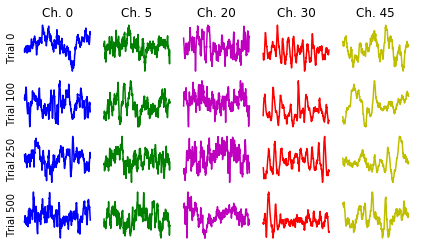

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline
trials   = [0, 100, 250, 500]
channels = [0, 5, 20, 30, 45] 
colors   = {0:'b', 5:'g', 20:'m', 30:'r', 45:'y'}
count    = 1
plt.figure(figsize=(7,4))
for t in trials:
    for c in channels:
        plt.subplot(len(trials), len(channels), count)
        plt.subplots_adjust(wspace=.1, hspace=.1)
        plt.box(False)
        plt.plot(lfp_data.data[t,c,1000:2000], c=colors[c])
        plt.xticks([])
        plt.yticks([])
        if c == 0:
            plt.ylabel('Trial ' + str(t))
        if t == 0:
            plt.title('Ch. ' + str(c))
        count += 1
plt.show()

Next, we can save the data in numpy format (.npy), by calling the function save_npy(). The data will be saved in 'raw_lfp/FILENAME', the filename is structure as: MONKEY_NAME_SESSION_DATE.npy, in our example: 'lucy_session01_150128.npy'.

In [11]:
lfp_data.save_npy()

You can check the information saved with the method 'print_saved_info()':

In [12]:
lfp_data.print_saved_info()

------------------------+------------------------------------------------------------------------
Number of channels      | 49/56
------------------------+------------------------------------------------------------------------
Number of trials        | 540/1006.0
------------------------+------------------------------------------------------------------------
Number of channel pairs | 1176
------------------------+------------------------------------------------------------------------
Pairs matrix            | [array([0, 1]), array([0, 2]), array([0, 3]), array([0, 4]), array([0, 5])]...
------------------------+------------------------------------------------------------------------
Real trial index        | [ 2  3  4 10 13 14 15 16 19 20]...
------------------------+------------------------------------------------------------------------
Sample frequency        | 1000 Hz
------------------------+------------------------------------------------------------------------
Time array    

But, what exactly is saved? The file saved in the cell above is a dictionary with two keys: 'data', and 'info'. The first one contains the LFP data, the second is a dictionary itself with several informations, below we descrive what is contained in each key of the 'info' dictionary:
1. nC : Number of channels used (not necessarily the total number of channels in the data);
2. nP : The total number of channel pairs.
3. nT : The total number of trials used.
4. pairs : A matrix $nP\times 2$, with the index of channels that form each pair. So, pair 1 is the first row of this matrix, and the number in each column indicates the channel numbers that form this particular pair (this is not the real index of the channels, this one goes from 0 to nC-1, however they can be used to retrieve the original indexes and labels, I will explain this below).
5. indt : The real number of each trial used.
6. fsample : Frequency sample of the LFP signal.
7. tarray : Array containing the time axis (in our example it goes from -0.65 to 3.0).
8. channels_labels : Array containing the original channels labels.
9. dcue : Array containing the time interval between sample on, and sample off for each trial.
10. dsm  : Array containing the time interval between sample on, and match on for each trial.
11. stim : Stimulus label for each of the trials used.
12. indch: Real index of the channels used.
We can load the saved file using:

In [13]:
import numpy as np
lfp_raw = np.load('raw_lfp/lucy_session01_150128.npy', allow_pickle=True).item()

And then check its keys:

In [ ]:
print('Printing dictionary keys')
print('------------------------------------------------------------------')
print('Keys: ' + str(lfp_raw.keys()))

Printing dictionary keys
------------------------------------------------------------------
Keys: dict_keys(['data', 'info'])


The dictionary 'lfp_raw['data']' contains the matrix with the LFP, let's check 'lfp_raw['info']'.

In [ ]:
print('Printing values saved in the info key')
print('-------------------------------------------------------------------------------------------------------')
print('Number of channels (nC) : ' + str(lfp_raw['info']['nC']))
print('-------------------------------------------------------------------------------------------------------')
print('Number of pairs (nP) : ' + str(lfp_raw['info']['nP']))
print('-------------------------------------------------------------------------------------------------------')
print('Number of trials (nT) : ' + str(lfp_raw['info']['nT']))
print('-------------------------------------------------------------------------------------------------------')
print('Pairs (pairs) : \n' + str(lfp_raw['info']['pairs'][:5,:]) + '\n ...' ) 
print('-------------------------------------------------------------------------------------------------------')
print('Trial indexes (indt) :' + str(lfp_raw['info']['indt'][:10]) + '...' ) 
print('-------------------------------------------------------------------------------------------------------')
print('Frequency sample (fsample) :' + str(lfp_raw['info']['fsample']) + '...' ) 
print('-------------------------------------------------------------------------------------------------------')
print('Time axis (tarray) : ' + str(lfp_raw['info']['tarray'][::400]))
print('-------------------------------------------------------------------------------------------------------')
print('Channel labels (channels_labels) : ' + str(lfp_raw['info']['channels_labels'][:10]) + '...')
print('-------------------------------------------------------------------------------------------------------')
print('Duration sample on/off (dcue) : ' + str(lfp_raw['info']['dcue'][::50])  + '...' )
print('-------------------------------------------------------------------------------------------------------')
print('Duration sample on/match on (dsm) : ' + str(lfp_raw['info']['dsm'][::50])  + '...' )
print('-------------------------------------------------------------------------------------------------------')
print('Stimulus label (stim) : ' + str(lfp_raw['info']['stim'][::25])  + '...' )
print('-------------------------------------------------------------------------------------------------------')
print('Real channels indexes (dsm) : ' + str(lfp_raw['info']['indch'][::3])  + '...' )
print('-------------------------------------------------------------------------------------------------------')

Printing values saved in the info key
-------------------------------------------------------------------------------------------------------
Number of channels (nC) : 49
-------------------------------------------------------------------------------------------------------
Number of pairs (nP) : 1176
-------------------------------------------------------------------------------------------------------
Number of trials (nT) : 540
-------------------------------------------------------------------------------------------------------
Pairs (pairs) : 
[[0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]]
 ...
-------------------------------------------------------------------------------------------------------
Trial indexes (indt) :[ 2  3  4 10 13 14 15 16 19 20]...
-------------------------------------------------------------------------------------------------------
Frequency sample (fsample) :1000...
------------------------------------------------------------------------------------------------------

I would like to point that, if a given session has $nC$ channels, the total number of pairs is $nP = \text{comb}(nC,2)$ since coherence is simetric. But, how can we keep track of the real channel index, and labels?

To illustrate, supose that for a given session, we have $nC = 10$, therfore the real channel indexes are: $I^{\rm channel}_{\rm real} = [0,1,2,3,4,5,6,7,8,9]$, however suppose that we are not going to use the channels with index $2$, $6$, and $9$ (due to msmod os slvr for instance), which would result in $I^{\rm channel}_{\rm real} = [0,1,3,4,5,7,8]$, and a new $nC^{'} = 7$. 

Consequentily, $nP = \text{comb}(7, 2) = 21$. Since arrays are indexed from zero to a maximum length in python, we assign new indexes to our channels that we will call $I^{\rm channel}_{\rm python}$, and they go from $0$ to $nC^{'}$. So, $I^{\rm channel}_{\rm python}$ is nothing else than the indexes to $I^{\rm channel}_{\rm real}$, and we can retrieve the real index of the channel $I^{\rm channel}_{\rm python} = 5$ by simply tanking the 5th element of $I^{\rm channel}_{\rm python}$, and the channel label, and anatomical area, by their turn, are indexed by $I^{\rm channel}_{\rm python}$.

In [ ]:
print('---------------------+--------------------')
print('Pair index           | 153')
print('---------------------+--------------------')
print('Channel index        | ' + str(lfp_data.pairs[153,0]) + ', ' + str(lfp_data.pairs[153,1]) )
print('---------------------+--------------------')
print('Real channel index   | ' + str(lfp_data.indch[2]) + ', ' + str(lfp_data.indch[27]) )
print('---------------------+--------------------')
print('Channel label        | ' + str(lfp_data.labels[2]) + ', ' + str(lfp_data.labels[27]) )
print('---------------------+--------------------')
print('Channel region       | ' + str(lfp_data.recording_info['area'][3]) + ', ' + str(lfp_data.recording_info['area'][31]) )

---------------------+--------------------
Pair index           | 153
---------------------+--------------------
Channel index        | 3, 16
---------------------+--------------------
Real channel index   | 3, 30
---------------------+--------------------
Channel label        | 9, 134
---------------------+--------------------
Channel region       | F7, LIP


### 2. Demonstration on how to perform spectral analysis using the spectral_analysis class

After instatiatig a LFP object as we have shown above, we can use this object to instantiate the class spectral_analysis, it is also possible to instantiate a spectral analysis object by loading the data saved by an LFP object. For now this class can filter (using MNE), and compute pairwise time-frequency coherence of the data.

The spectral analysis class can be imported from the GDa package with:

In [ ]:
from GDa.spectral_analysis import spectral_analysis

Here we will instantiate the spectral_analysis object using the LFP object that we have created above. To instantiate a spectral_analysis object you have to call the constructor method and give the parameters listed below:
1. LFP : An object of the type LFP;
2. step: The step used to downsample the LFP signal;
3. dt  : The new time resolution used to create the downsampled time-array;
4. fc  : The frequency centers used to band-pass the data;
5. df  : The frequency resolution, or width of the band-pass filter;

In [ ]:
spectral = spectral_analysis(LFP = lfp_data, step = 25, dt = 250, fc = np.arange(6, 62, 2), df = 4)

Remember that the matrix containing the LFP data has dimension $[nT, nC, L]$, where $nT$ is the number of trials, $nC$ the number of channels, and $L$ the number of time points of the data, now the data can also be acessed via the spectral_analysis object since it copy this atribute from the LFP object. We can filter the signal using the spectra_analysis method called _filter_ , we can either (1) give to the function the signal we wish to filter (with dimension $[1,L]$), or (2) specify the trial, and channel number of the signal we wish to filter, as we show below:

In [ ]:
print('Filtering signal using method (1)')
signal_filtered1 = spectral.filter(signal = spectral.data[0,0,:], f_low = 12, f_high = 16, n_jobs = 1)

Filtering signal using method (1)


In [ ]:
print('Filtering signal using method (2)')
signal_filtered2 = spectral.filter(trial = 0, index_channel = 0, f_low = 12, f_high = 16, n_jobs = 1)

Filtering signal using method (2)


Now we can plot the original siginal alongside the filtered signal:

Text(0.5, 1.0, 'Signal filtered on 12-16 Hz band')

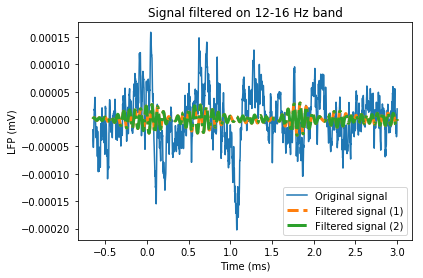

In [ ]:
plt.plot(spectral.tarray, spectral.data[0,0,:], label = 'Original signal')
plt.plot(spectral.tarray, signal_filtered1, '--',lw = 3,label = 'Filtered signal (1)')
plt.plot(spectral.tarray, signal_filtered2, '-.', lw = 3, label = 'Filtered signal (2)')
#plt.xlim([0.5,1.5])
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('LFP (mV)')
plt.title('Signal filtered on 12-16 Hz band')

Finally, we can compute pairwise coherece using the 'pairwise_coherence()' method, this method receives as argument:
1. trial: The trial of the data to use;
2. index_pair: The index of the channel pair, it contains the index of the two channels that form this specific pair.
3. n_jobs: The number of jobs to use.

In [ ]:
spectral.pairwise_coherence(0, 0, n_jobs = 40)

Trial: 0, Pair: 0


We can plot the pairwise coherence then:

In [ ]:
plt.imshow(spectral.coh.T, aspect='auto', cmap='jet', origin = 'lower', interpolation = 'gaussian', extent=[-0.65, 3, 6, 62])
plt.colorbar()
plt.title('Coherence between channel ' + str(lfp_data.labels[lfp_data.pairs[0,0]]) + ', and ' + str(lfp_data.labels[lfp_data.pairs[0,1]]) )
plt.ylabel(r'$F_{c}$ [Hz]')
plt.xlabel('Time (ms)')

Alternatively, you could do the same as it was done above, but instead of using an LFP object you can load the data saved by the LFP object to instantiate the spectral_analysis class. To do that, you must give the path to the '.npy' file instead of the LFP object.

In [ ]:
spectral = spectral_analysis(path = 'raw_lfp/lucy_session01_150128.npy', step = 25, dt = 250, fc = np.arange(6, 62, 2), df = 4)

In [ ]:
print('Filtering signal using method (1)')
signal_filtered1 = spectral.filter(signal = spectral.data[0,0,:], f_low = 12, f_high = 16, n_jobs = 1)

In [ ]:
print('Filtering signal using method (2)')
signal_filtered2 = spectral.filter(trial = 0, index_channel = 0, f_low = 12, f_high = 16, n_jobs = 1)

In [ ]:
spectral.pairwise_coherence(0, 0, n_jobs = 40)

In [ ]:
plt.imshow(spectral.coh.T, aspect='auto', cmap='jet', origin = 'lower', interpolation = 'gaussian', extent=[-0.65, 3, 6, 62])
plt.colorbar()
plt.title('Coherence between channel ' + str(lfp_data.labels[lfp_data.pairs[0,0]]) + ', and ' + str(lfp_data.labels[lfp_data.pairs[0,1]]) )
plt.ylabel(r'$F_{c}$ [Hz]')
plt.xlabel('Time (ms)')

As can be seen the results are equivalent as expected. And you can instantiate the object in the way it is more convenient.